# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [8]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/SURFACE_CRACK/SURFACE_CRACK_TRAIN.csv")
df_train

,c_index,a/c,a/t,c/b,phi,K-T
0,0.0,0.90,0.6,0.3,0.104720,40.307724
1,0.0,0.90,0.6,0.3,0.127808,39.933349
2,0.0,0.90,0.6,0.3,0.150895,39.581137
3,0.0,0.90,0.6,0.3,0.173983,39.252257
4,0.0,0.90,0.6,0.3,0.197071,38.942722
...,...,...,...,...,...,...
322299,2517.0,1.25,0.7,0.4,2.944522,42.049678
322300,2517.0,1.25,0.7,0.4,2.967609,42.477554
322301,2517.0,1.25,0.7,0.4,2.990697,42.920955
322302,2517.0,1.25,0.7,0.4,3.013785,43.379250


In [ ]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:4].drop_duplicates().to_numpy()

print(len(train_combinations))

2518


In [ ]:
print("Different a/c values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,1], axis=0))
print("Different c/b values: ", np.unique(train_combinations[:,2], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,4], axis=0))

Different a/c values:  [0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55
 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
Different a/t values:  [0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85]
Different c/b values:  [0.01 0.1  0.2  0.3  0.4 ]
Different phi values:  [0.10471976 0.12780758 0.1508954  0.17398322 0.19707104 0.22015886
 0.24324668 0.2663345  0.28942232 0.31251014 0.33559796 0.35868578
 0.3817736  0.40486142 0.42794924 0.45103706 0.47412488 0.4972127
 0.52030052 0.54338834 0.56647616 0.58956398 0.6126518  0.63573962
 0.65882744 0.68191526 0.70500308 0.7280909  0.75117872 0.77426654
 0.79735436 0.82044218 0.84353    0.86661782 0.88970564 0.91279346
 0.93588128 0.9589691  0.98205692 1.00514474 1.02823256 1.05132038
 1.0744082  1.09749602 1.12058384 1.14367166 1.16675948 1.1898473
 1.21293512 1.23602294 1.25911076 1.28219858 1.3052864  1.32837422
 1.35146204 1.37454

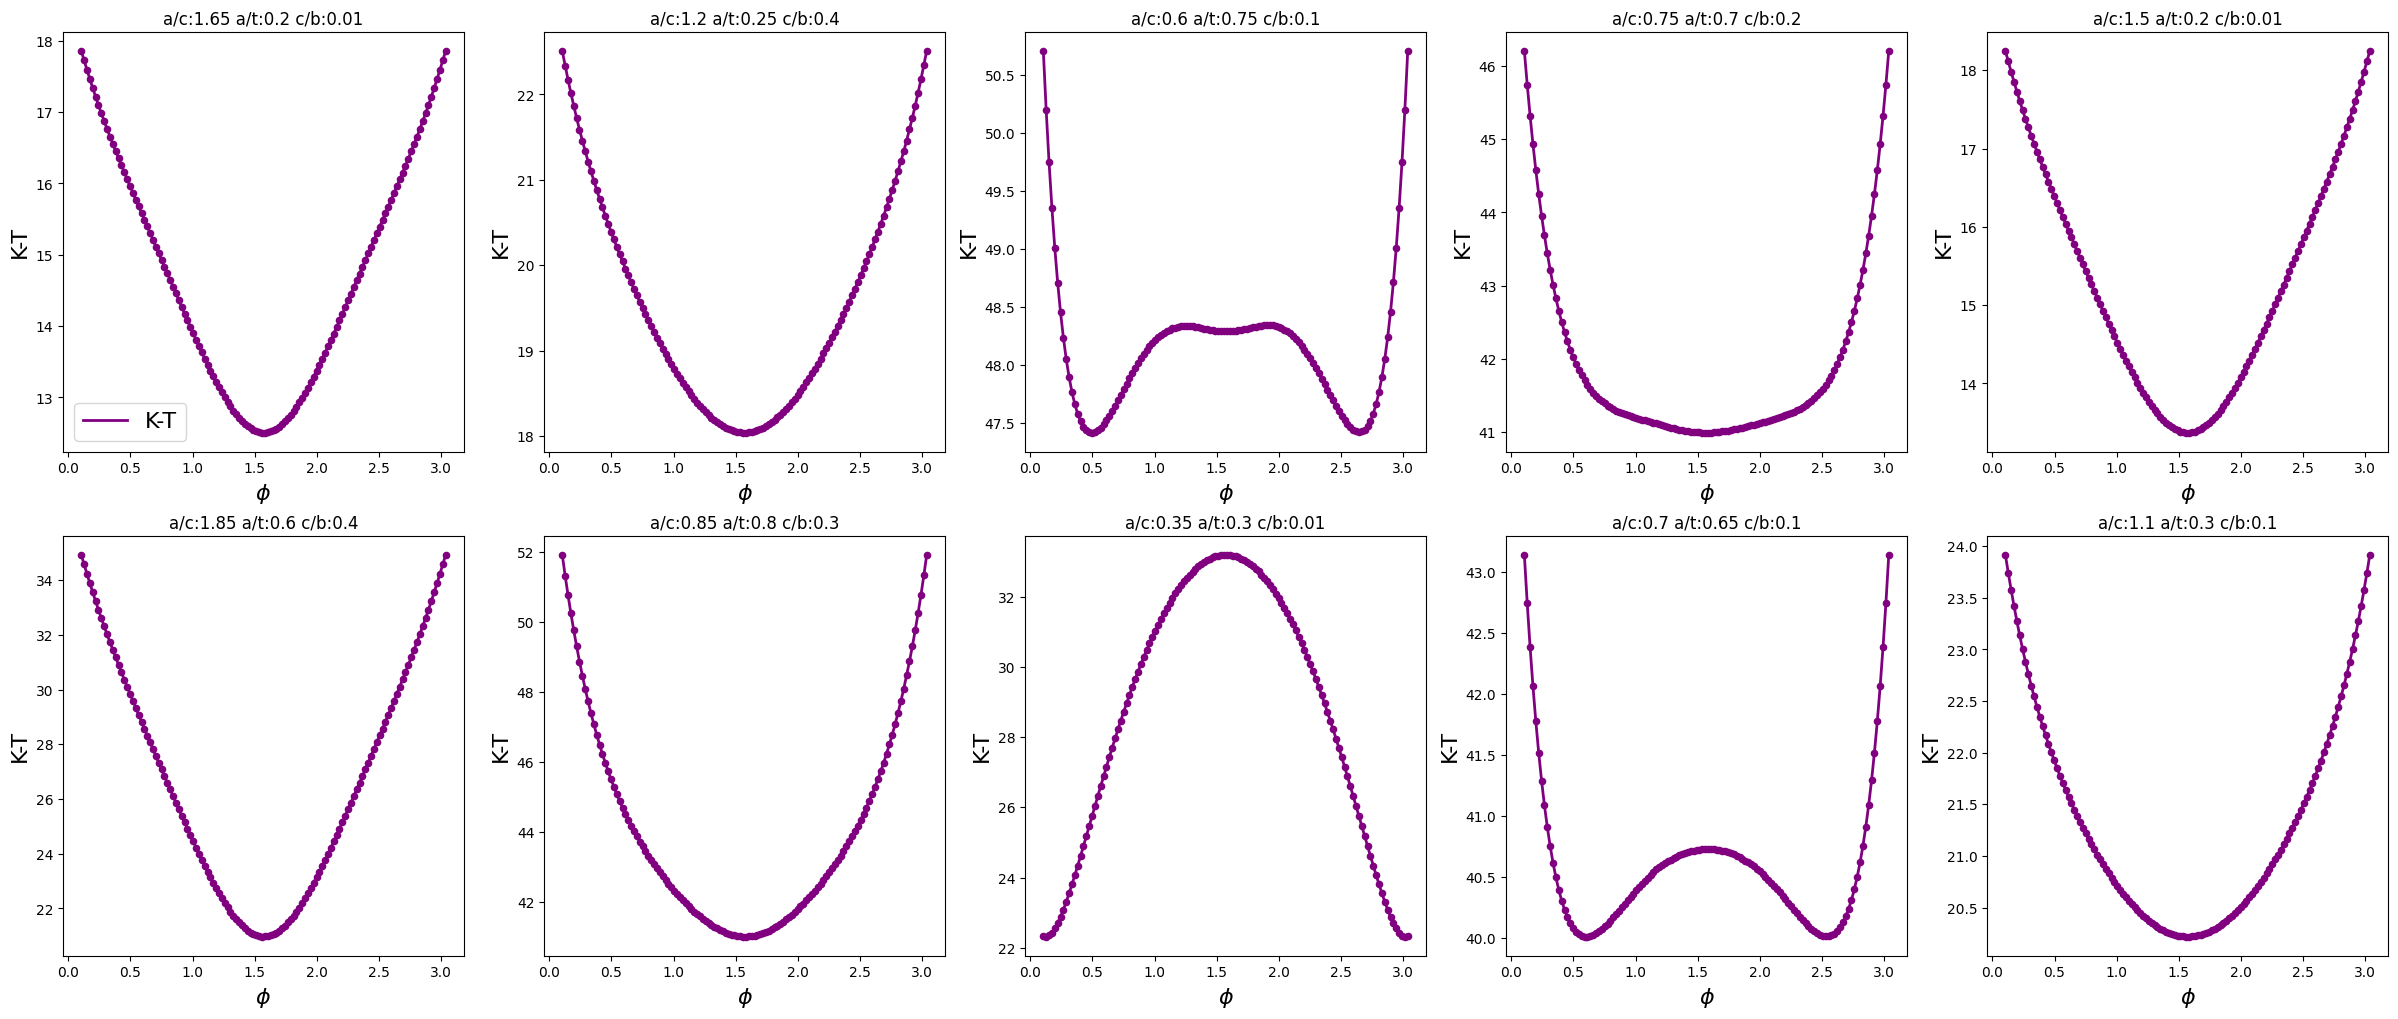

In [22]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(0)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        a_c = np.unique(data[:,1])
        a_t = np.unique(data[:,2])
        c_b = np.unique(data[:,3])

        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(c_b) == 1

        axs[i,j].plot(data[:,-2], data[:,-1], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-2], data[:,-1], color='purple', s=20)

        axs[i,j].set_title("a/c:{} a/t:{} c/b:{}".format(a_c[0], a_t[0], c_b[0]))
        axs[i,j].set_ylabel("K-T", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [23]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/SURFACE_CRACK/SURFACE_CRACK_TEST.csv")
df_test

,c_index,a/c,a/t,c/b,phi,K-T
0,0.0,1.425,0.225,0.0125,0.104720,19.597453
1,0.0,1.425,0.225,0.0125,0.127808,19.453829
2,0.0,1.425,0.225,0.0125,0.150895,19.312760
3,0.0,1.425,0.225,0.0125,0.173983,19.176130
4,0.0,1.425,0.225,0.0125,0.197071,19.044489
...,...,...,...,...,...,...
56059,437.0,0.425,0.825,0.4500,2.944522,63.939989
56060,437.0,0.425,0.825,0.4500,2.967609,64.259458
56061,437.0,0.425,0.825,0.4500,2.990697,64.674951
56062,437.0,0.425,0.825,0.4500,3.013785,65.205603


In [ ]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:4].drop_duplicates().to_numpy()

print(len(test_combinations))

438


In [ ]:
print("Different a/c values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,1], axis=0))
print("Different c/b values: ", np.unique(test_combinations[:,2], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,4], axis=0))

Different a/c values:  [0.225 0.425 0.625 0.825 1.    1.025 1.225 1.425 1.625 1.815 2.025]
Different a/t values:  [0.225 0.325 0.425 0.525 0.625 0.725 0.825]
Different c/b values:  [0.0125 0.015  0.15   0.175  0.25   0.275  0.35   0.375  0.45  ]
Different phi values:  [0.10471976 0.12780758 0.1508954  0.17398322 0.19707104 0.22015886
 0.24324668 0.2663345  0.28942232 0.31251014 0.33559796 0.35868578
 0.3817736  0.40486142 0.42794924 0.45103706 0.47412488 0.4972127
 0.52030052 0.54338834 0.56647616 0.58956398 0.6126518  0.63573962
 0.65882744 0.68191526 0.70500308 0.7280909  0.75117872 0.77426654
 0.79735436 0.82044218 0.84353    0.86661782 0.88970564 0.91279346
 0.93588128 0.9589691  0.98205692 1.00514474 1.02823256 1.05132038
 1.0744082  1.09749602 1.12058384 1.14367166 1.16675948 1.1898473
 1.21293512 1.23602294 1.25911076 1.28219858 1.3052864  1.32837422
 1.35146204 1.37454986 1.39763768 1.4207255  1.44381332 1.46690114
 1.48998896 1.51307678 1.5361646  1.55925242 1.58234024 1.60542

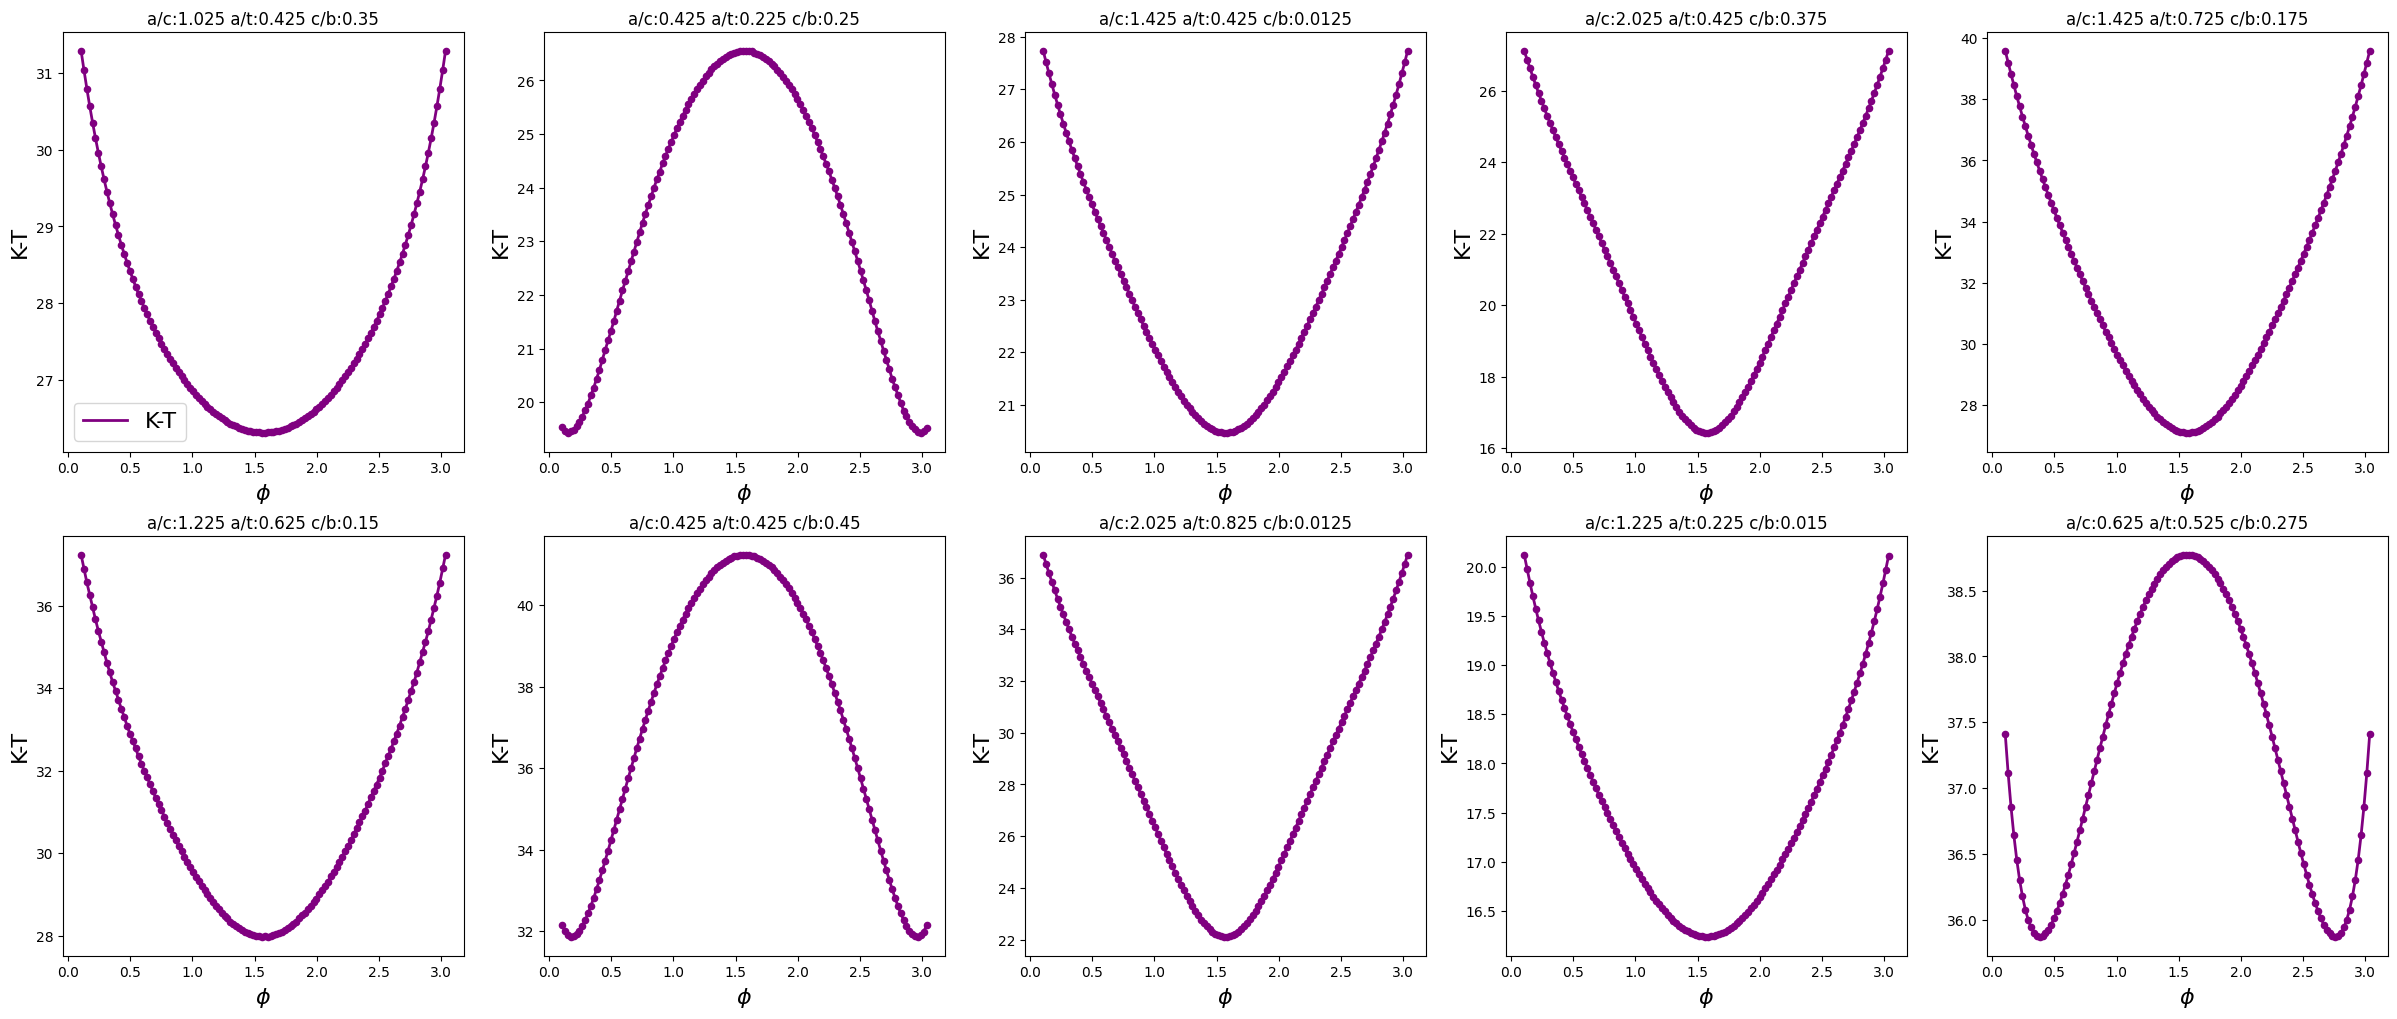

In [26]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(0)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        a_c = np.unique(data[:,1])
        a_t = np.unique(data[:,2])
        c_b = np.unique(data[:,3])

        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(c_b) == 1

        axs[i,j].plot(data[:,-2], data[:,-1], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-2], data[:,-1], color='purple', s=20)

        axs[i,j].set_title("a/c:{} a/t:{} c/b:{}".format(a_c[0], a_t[0], c_b[0]))
        axs[i,j].set_ylabel("K-T", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()